In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
## import data
data_path = "data/housing_target1.csv"
housing_data = pd.read_csv(data_path)
housing_data.head(5)

,주택유형,점유형태,주택나이,이사계획,공공임대주택입주의향,월평균가구소득,생활비,총자산,총부채,최종학력,주거지원1
0,2,2,8,2,1,180,100,6500,0,1,2
1,2,3,7,2,1,70,70,9000,0,2,6
2,2,1,8,2,2,60,60,40000,0,1,4
3,6,1,8,2,1,248,230,23000,0,1,6
4,6,3,7,2,1,120,120,13000,13000,1,2


In [2]:
np_housing_data = np.array(housing_data)
print(np_housing_data[0:5, :])
print(np_housing_data.shape)

[[    2     2     8     2     1   180   100  6500     0     1     2]
 [    2     3     7     2     1    70    70  9000     0     2     6]
 [    2     1     8     2     2    60    60 40000     0     1     4]
 [    6     1     8     2     1   248   230 23000     0     1     6]
 [    6     3     7     2     1   120   120 13000 13000     1     2]]
(18746, 11)


In [3]:
datax = np_housing_data[:,:10]
datay = np_housing_data[:,10:]
print(datax[0:5,:])
print(datay[0:10])

[[    2     2     8     2     1   180   100  6500     0     1]
 [    2     3     7     2     1    70    70  9000     0     2]
 [    2     1     8     2     2    60    60 40000     0     1]
 [    6     1     8     2     1   248   230 23000     0     1]
 [    6     3     7     2     1   120   120 13000 13000     1]]
[[2]
 [6]
 [4]
 [6]
 [2]
 [2]
 [2]
 [6]
 [2]
 [2]]


In [4]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size=0.3)
print(trnx.shape, tstx.shape, trny.shape, tsty.shape)

(13122, 10) (5624, 10) (13122, 1) (5624, 1)


In [5]:
from sklearn.preprocessing import MinMaxScaler # Step 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scaler = MinMaxScaler() # Step 2
scaler.fit(trnx) # Step 3
trnx_scale = scaler.transform(trnx) # Step 4
tstx_scale = scaler.transform(tstx) # Step 4
print(np.min(trnx_scale[:,0]), np.max(trnx_scale[:,0]))
print(np.min(tstx_scale[:,0]), np.max(tstx_scale[:,0]))

-1.4718190266754776 3.831385231668093
-1.4718190266754776 3.831385231668093


In [6]:
## kNN
from sklearn import neighbors
k=5
knn_model = neighbors.KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X=trnx_scale, y=trny)

/Users/chopper/.conda/envs/machinelearning/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [7]:
knn_pred_trn = knn_model.predict(X=trnx_scale)
knn_pred_tst = knn_model.predict(X=tstx_scale)

In [8]:
print(knn_pred_trn)
print(knn_pred_tst)

[6 1 3 ... 3 3 3]
[3 1 2 ... 3 3 3]


In [9]:
from sklearn import metrics
print(metrics.accuracy_score(trny, knn_pred_trn))
print(metrics.accuracy_score(tsty, knn_pred_tst))

0.5864959609815577
0.45216927453769556


In [10]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=3, min_samples_split=9)
tree_model.fit(X=trnx_scale, y=trny)

DecisionTreeClassifier(max_depth=3, min_samples_split=9)

In [11]:
tree_pred = tree_model.predict(X=tstx_scale)

In [12]:
tree_model.feature_importances_

array([0.19878218, 0.50557507, 0.        , 0.        , 0.09046851,
       0.03405259, 0.        , 0.14008095, 0.        , 0.0310407 ])

In [13]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='term_project.dot', max_depth=3)

[Text(0.5, 0.875, 'X[1] <= -0.493\ngini = 0.795\nsamples = 13122\nvalue = [1203, 2925, 4486, 1289, 683, 1600, 673, 262, 1]'),
 Text(0.25, 0.625, 'X[0] <= -0.676\ngini = 0.663\nsamples = 5241\nvalue = [44, 427, 2754, 1120, 175, 342, 242, 136, 1]'),
 Text(0.125, 0.375, 'X[9] <= -1.54\ngini = 0.61\nsamples = 1283\nvalue = [9, 44, 395, 692, 30, 54, 33, 25, 1]'),
 Text(0.0625, 0.125, 'gini = 0.431\nsamples = 492\nvalue = [1, 10, 92, 359, 4, 9, 5, 11, 1]'),
 Text(0.1875, 0.125, 'gini = 0.668\nsamples = 791\nvalue = [8, 34, 303, 333, 26, 45, 28, 14, 0]'),
 Text(0.375, 0.375, 'X[4] <= 0.145\ngini = 0.613\nsamples = 3958\nvalue = [35, 383, 2359, 428, 145, 288, 209, 111, 0]'),
 Text(0.3125, 0.125, 'gini = 0.708\nsamples = 1409\nvalue = [7, 125, 691, 114, 99, 221, 116, 36, 0]'),
 Text(0.4375, 0.125, 'gini = 0.543\nsamples = 2549\nvalue = [28, 258, 1668, 314, 46, 67, 93, 75, 0]'),
 Text(0.75, 0.625, 'X[7] <= -0.24\ngini = 0.796\nsamples = 7881\nvalue = [1159, 2498, 1732, 169, 508, 1258, 431, 126, 

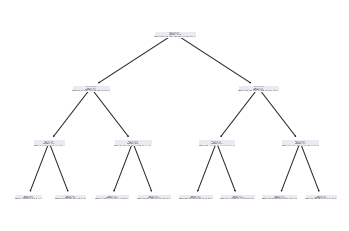

In [14]:
from sklearn.tree import plot_tree
plot_tree(tree_model)

In [15]:
from sklearn.metrics import confusion_matrix
tsty_pred = tree_model.predict(tstx_scale)
confusion_matrix(tsty, tsty_pred)

array([[ 245,  244,   33,    3,    0,    0,    0,    0],
       [ 147,  746,  341,   21,    0,    0,    0,    0],
       [  46,  406, 1344,  150,    0,    0,    0,    0],
       [  30,   26,  204,  278,    0,    0,    0,    0],
       [  29,  193,   79,   14,    0,    0,    0,    0],
       [ 183,  360,  121,   19,    0,    0,    0,    0],
       [  22,  109,  120,    7,    0,    0,    0,    0],
       [  16,   15,   60,   13,    0,    0,    0,    0]])

In [16]:
from sklearn import metrics
print(metrics.accuracy_score(tsty, tsty_pred))
print(metrics.precision_score(tsty, tsty_pred, average='macro'))
print(metrics.recall_score(tsty, tsty_pred, average='macro'))

0.46461593172119486
0.22887101901031437
0.2835581354966679


/Users/chopper/.conda/envs/machinelearning/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
## Ensemble
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=0)
rf_model.fit(X=trnx_scale, y=trny)

/Users/chopper/.conda/envs/machinelearning/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(max_depth=10, random_state=0)

In [19]:
rf_pred = rf_model.predict(X=tstx_scale)

In [20]:
print(metrics.accuracy_score(tsty, rf_pred))

0.5026671408250356


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(max_depth=10, n_estimators = 30, random_state = 0)
gbm_model.fit(X=trnx_scale, y=trny)

/Users/chopper/.conda/envs/machinelearning/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=10, n_estimators=30, random_state=0)

In [22]:
gbm_pred = gbm_model.predict(X=tstx_scale)

In [23]:
from sklearn import metrics
print(metrics.accuracy_score(tsty, gbm_pred))

0.47688477951635844


In [24]:
## Performance Evaluation
from sklearn.metrics import accuracy_score
acc = np.array([accuracy_score(tsty, tree_pred),accuracy_score(tsty, gbm_pred)])
print(acc)

[0.46461593 0.47688478]


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(tsty, tree_pred)

array([[ 245,  244,   33,    3,    0,    0,    0,    0],
       [ 147,  746,  341,   21,    0,    0,    0,    0],
       [  46,  406, 1344,  150,    0,    0,    0,    0],
       [  30,   26,  204,  278,    0,    0,    0,    0],
       [  29,  193,   79,   14,    0,    0,    0,    0],
       [ 183,  360,  121,   19,    0,    0,    0,    0],
       [  22,  109,  120,    7,    0,    0,    0,    0],
       [  16,   15,   60,   13,    0,    0,    0,    0]])

In [26]:
confusion_matrix(tsty, gbm_pred)

array([[ 203,  191,   35,    5,    5,   83,    2,    1],
       [ 119,  605,  363,   18,   18,  113,   15,    4],
       [  29,  292, 1426,   96,   16,   58,   15,   14],
       [   8,   20,  221,  254,    5,   18,    4,    8],
       [  23,  120,  106,    8,   13,   39,    4,    2],
       [  94,  232,  130,   21,   15,  174,   10,    7],
       [  16,   67,  133,    6,    5,   23,    7,    1],
       [   8,   20,   55,   11,    1,    5,    4,    0]])

In [27]:
# tensorflow keras NN 1
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
input_shape = (10, )
mlp_model1 = models.Sequential()
mlp_model1.add(layers.Dense(units=64, activation='relu', input_shape=input_shape))
mlp_model1.add(layers.Dense(units=512, activation='relu'))
mlp_model1.add(layers.Dense(units=256, activation='relu'))
mlp_model1.add(layers.Dense(units=128, activation='relu'))
mlp_model1.add(layers.Dense(units=64, activation='relu'))
# mlp_model1.add(layers.Dropout(0.1))
mlp_model1.add(layers.Dense(units=9, activation='softmax'))
mlp_model1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
mlp_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
dense_1 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 585       
Total params: 207,049
Trainable params: 207,049
Non-trainable params: 0
__________________________________________________

2022-06-19 14:16:15.308300: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-19 14:16:15.308551: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [28]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
trny_onehot = encoder.fit_transform(trny)
tsty_onehot = encoder.transform(tsty)

print(trny_onehot[0:5])
print(tsty_onehot[0:5])

[[0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0]]
[[0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]]


In [29]:
history1 = mlp_model1.fit(np.asarray(trnx).astype(float), np.asarray(trny_onehot).astype(float), validation_data=[np.asarray(tstx).astype(float), np.asarray(tsty_onehot).astype(float)], batch_size=10, epochs=50)

Train on 13122 samples, validate on 5624 samples
Epoch 1/50
13122/13122 [==============================] - 10s 732us/sample - loss: 1854.2893 - accuracy: 0.2616 - val_loss: 1.8994 - val_accuracy: 0.3460
Epoch 2/50
13122/13122 [==============================] - 10s 740us/sample - loss: 1.8437 - accuracy: 0.3419 - val_loss: 1.8053 - val_accuracy: 0.3460
Epoch 3/50
13122/13122 [==============================] - 10s 760us/sample - loss: 1.8039 - accuracy: 0.3419 - val_loss: 1.7901 - val_accuracy: 0.3460
Epoch 4/50
13122/13122 [==============================] - 11s 801us/sample - loss: 1.7963 - accuracy: 0.3419 - val_loss: 1.7856 - val_accuracy: 0.3460
Epoch 5/50
13122/13122 [==============================] - 11s 874us/sample - loss: 1.7934 - accuracy: 0.3419 - val_loss: 1.7835 - val_accuracy: 0.3460
Epoch 6/50
13122/13122 [==============================] - 12s 913us/sample - loss: 1.7921 - accuracy: 0.3419 - val_loss: 1.7825 - val_accuracy: 0.3460
Epoch 7/50
13122/13122 [==================

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()